# OASIS INFOBYTE TASK 5<br>  JANUARY 23 BATCH

# SALES PREDICTION MODEL

In [1]:
#Prepared by; Seghosime Joshua
#Email; vanjosh8@gmail.com
#phone; +2347032803248

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Data Science\Datasets\advertizing.csv")

In [5]:
#check the df
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#check the total numbers of rows and columns
df.shape

(200, 4)

In [7]:
#print the column features
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [8]:
#check general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
#perform a statistical analysis
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

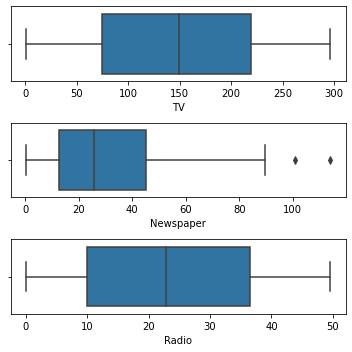

In [12]:
#checking for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

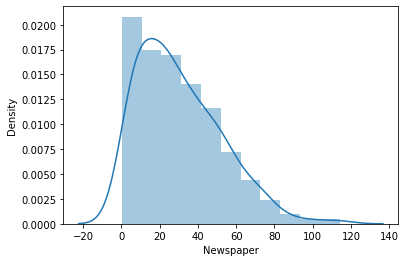

In [13]:
sns.distplot(df['Newspaper'])

In [14]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [15]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [16]:
data = df.copy()

In [17]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

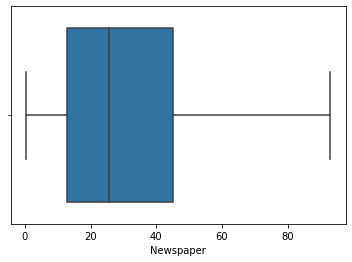

In [18]:
sns.boxplot(data['Newspaper'])

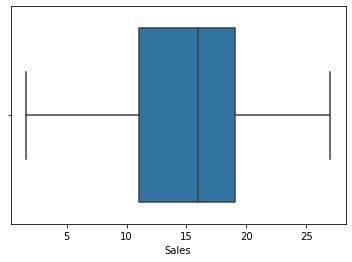

In [19]:
sns.boxplot(data['Sales']);

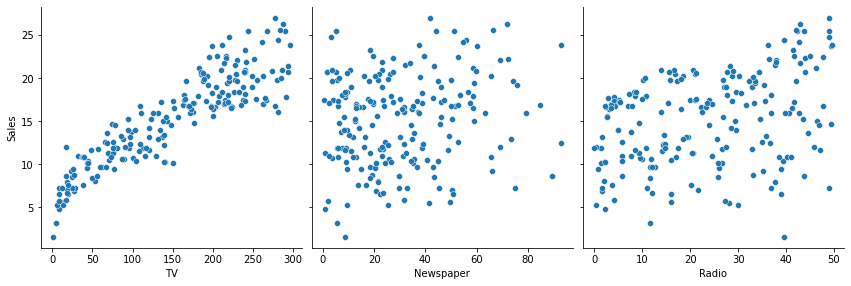

In [20]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

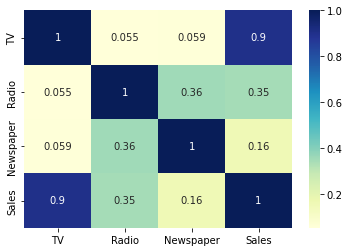

In [21]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [29]:
#To select the important features having correlation of +0.5 amd -0.5
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [30]:
#print the selected feature
print(important_features)

['TV', 'Sales']


# Feature Selection

In [61]:
#declaring dependent and independent variable or feature
X = data['TV']
y = data['Sales']

In [63]:
X = X.values.reshape(-1,1)

In [64]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [65]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [72]:
print(X.shape,y.shape)

(200, 1) (200,)


# Data Splitting

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [74]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


# Model Selection

In [75]:
#importing the model algorithms
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# KNeighborsRegressor

In [78]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [82]:
knn_train_pred = knn.predict(X_train)

In [83]:
knn_test_pred = knn.predict(X_test)

In [85]:
print(knn_train_pred, knn_test_pred)

[11.62 19.38 14.46 10.12 11.04 18.42 11.04  7.18 19.26 21.44 17.12 18.2
 20.78 14.22 21.32 10.12 17.56 18.76 12.06 11.34 18.2  22.76 22.6   9.76
 12.44 12.9  10.12 18.82 20.8  19.78 12.96  6.84 13.56 19.3   4.44  8.02
  6.26 13.56 22.66 11.94 21.72 12.9   9.86 21.72 13.66 18.56  9.42 12.14
 19.56 22.6  12.52 12.08 10.06 18.6  13.12 11.34 19.3  13.64  9.8  19.62
  5.96 12.44 12.9  19.2  12.22  8.7  19.2  13.44 13.72 13.44 12.66  6.26
 12.82 13.64  4.44 14.26  6.84 18.18 17.56 20.78 12.9   5.96  7.18  9.54
 18.7  17.6  13.12 17.56 19.3  20.78 18.18 18.82 11.94 20.8  21.32  6.04
 16.46  7.18 17.24 13.1  12.08  9.92 16.08 23.4  19.76 20.78 17.98 10.9
 13.96 18.18 19.76  5.96 21.38 13.44 22.6   5.26 19.22 16.08 16.46 21.04
 12.82  5.96 19.2  22.66 12.08 23.4   5.96 19.3  19.62  8.7  21.32  7.18
 13.56  8.02] [23.68 20.1  17.56 11.04 16.96 13.42 19.38 22.66 11.34 19.68 19.6   8.7
 12.52 17.12 13.12 19.62 19.68 10.24 11.34 21.04 20.78 13.56 10.8  18.94
  9.54 20.78 19.38  6.84 19.6  13.64 14.

In [86]:
#declare a result head for the model summary
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [87]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.7631520073398229
RMSE: 2.1464233816592038


In [89]:
#check the result df
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.862334,0.763152,2.146423,0.099182


# Support Vector Regressor

In [91]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [92]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [93]:
print(svr_train_pred,svr_test_pred)

[11.06539874 18.78603899 14.53606478  8.52886334 10.89868206 18.376187
 11.01794703  7.49119201 19.69302255 20.141127   17.0260713  18.50357927
 19.9361777  14.78700155 20.30531367  8.71682729 16.4947895  18.59407292
 13.36722578 11.4082293  18.4579345  20.30860449 20.17191709  9.09483027
 15.02196798 15.21109045  8.62201653 19.31815275 20.23019896 19.20655725
 12.61967073  7.4253726  15.53761013 19.14920927  7.03138512  7.7780091
  7.24719016 15.65122279 19.84745832 11.77004591 20.02608001 15.17411245
  9.39331127 19.98780458 14.12900582 19.4573851   8.16216008 12.30504613
 19.59949707 20.23197532 13.06416852 11.62849832  9.52911791 19.77441068
 13.75369458 11.53794995 19.14475683 14.28943728 10.30877074 17.91598889
  7.08716377 15.10028369 15.16487527 19.5431211  13.23541786  7.80578618
 19.22834489 12.98550373 13.62629342 12.95492848 13.47356017  7.24387613
 12.40722859 14.41355197  6.99660974 14.70837907  7.39610707 18.18979474
 16.37765817 19.89004425 15.25738736  7.11143703  7.46

In [94]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.7705638242487232
RMSE: 2.112571828167327


In [95]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.862334,0.763152,2.146423,0.099182
1,Support Vector Machine,0.816965,0.770564,2.112572,0.046401


In [96]:
import statsmodels.api as sm

In [98]:
X_train_constant = sm.add_constant(X_train)

In [99]:
model = sm.OLS(y_train, X_train_constant).fit()

In [100]:
model.params

const    6.447492
x1       0.058825
dtype: float64

In [101]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     649.4
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           8.08e-53
Time:                        09:54:14   Log-Likelihood:                -301.88
No. Observations:                 134   AIC:                             607.8
Df Residuals:                     132   BIC:                             613.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4475      0.382     16.895      0.0

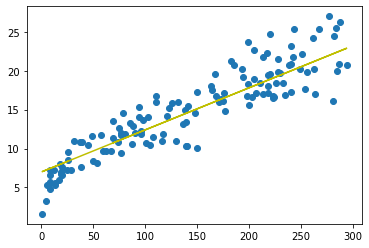

In [105]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [106]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

65     0.793617
59    -0.441816
118    2.058268
134    2.181884
49    -0.682851
         ...   
91    -0.829873
61     2.381664
172   -0.000452
157   -5.159403
106   -0.718105
Name: Sales, Length: 134, dtype: float64

In [107]:
y_train_pred

array([10.50638294, 18.84181558, 13.84173249,  8.61811626, 10.38285147,
       18.35945463, 10.47108823,  7.58868739, 20.10066003, 21.0594995 ,
       16.8594297 , 18.50651589, 20.55360874, 14.15938482, 21.90068995,
        8.77105998, 16.25941973, 18.61240001, 12.48876882, 10.76521077,
       18.45357384, 22.14775288, 22.95953108,  9.06518251, 14.45938981,
       14.70057029,  8.69458812, 19.53006232, 21.37715184, 19.3771186 ,
       11.76522739,  7.50045063, 15.11234184, 19.30064674,  6.68867243,
        7.92398708,  7.22397544, 15.25352065, 23.71836722, 11.0475684 ,
       20.75361206, 14.65351068,  9.28871564, 20.6653753 , 13.34172418,
       19.73006564,  8.30046392, 11.4887522 , 19.94771632, 22.73599795,
       12.18288139, 10.93580184,  9.3887173 , 20.24183885, 12.90642282,
       10.86521243, 19.29476429, 13.53584505,  9.95343257, 17.84179896,
        6.87691085, 14.55939147, 14.64174578, 19.85947956, 12.35347246,
        7.95339933, 19.40653085, 12.10640953, 12.76524401, 12.07

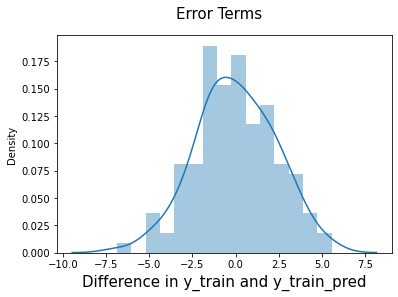

In [108]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

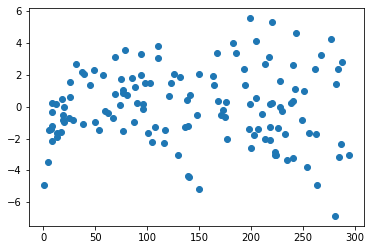

In [109]:
plt.scatter(X_train, res)
plt.show()

In [110]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [112]:
y_pred

array([22.54775953, 17.68885525, 16.18883032, 10.43579353, 16.45942305,
       13.0887788 , 18.84769803, 23.54777615, 10.88874223, 19.11829077,
       17.50061682,  8.02398874, 12.16523404, 16.8594297 , 12.90642282,
       17.94180063, 19.07711361,  8.97694575, 10.84168263, 21.0830293 ,
       20.57125609, 15.35940477, 10.33579187, 19.41829575,  9.75342925,
       20.52419649, 18.77710863,  7.45927347, 17.53002908, 13.5652573 ,
       14.19467953, 20.41242992, 22.72423305,  9.07694742, 23.67719006,
       23.48895164, 19.87712691, 22.07128102, 16.05353395, 17.08296282,
       18.20062846, 18.07121454, 14.63586333, 15.65940975, 20.41242992,
       11.72405023, 17.49473437, 22.04775122, 19.98301102, 18.61828246,
       14.4005653 , 10.87697733,  8.9828282 , 14.85351401,  8.68282322,
       10.51814784, 19.17711527, 10.60050215, 13.5181977 ,  8.06516589,
        7.44162612, 17.3241433 , 22.93011882,  7.84751522, 23.88307584,
       14.34762325])

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [114]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.302877682081116

In [115]:
r2 = r2_score(y_test, y_pred)
r2

0.7273655897327868

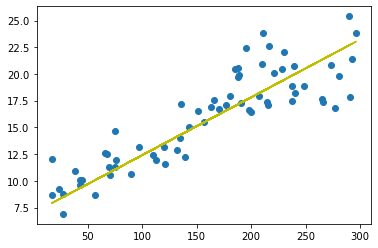

In [116]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()

*****This model is ready for deployment*****

Prepared by: Seghosime Joshua                                                     Supervised By: Prof. Ale Seun
Email: vanjosh8@gmail.com                                                         Email: aleseun@yahoo.com
Phone: +2347032803248                                                             Phone: +2348161369964